In [55]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

First we make a the reasonable subset of samples based on the meta-data. We are interested in patients with severe emphysema and smoker controls

In [56]:
#the phenotype table
df_pheno=pd.read_csv('/udd/relma/LTRC_analysis/datasets/LTRC/phenotype_table.tsv',sep='\t')
#column descriptions
df_pheno_description = pd.read_csv('/proj/regeps/regep00/studies/LTRC/data/phenotype/data/freezes/20230425/dataDict_ltrcLongTopMedHarm_20220923.csv')

Text(0.5, 0, 'LAA950_Total')

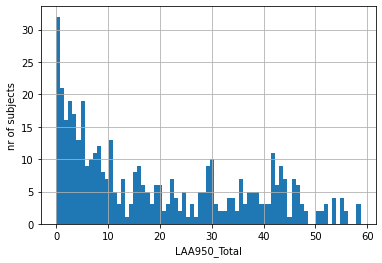

In [57]:
df_pheno[df_pheno['cp2primdx'].str.contains('Emphysema')]['LAA950_Total'].dropna().hist(bins=75)
plt.ylabel('nr of subjects')
plt.xlabel('LAA950_Total') 

Text(0.5, 1.0, 'Total nr of subjects =35')

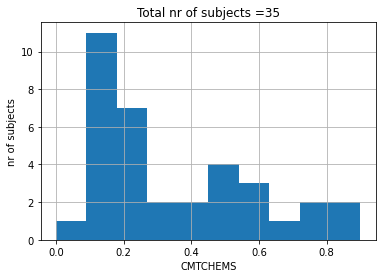

In [58]:
df_pheno[df_pheno['CMTCHEMS']<1]['CMTCHEMS'].hist()
plt.ylabel('nr of subjects')
plt.xlabel('CMTCHEMS') 
plt.title('Total nr of subjects ='+str(len(df_pheno[df_pheno['CMTCHEMS']<1])))

In [59]:
len(df_pheno[df_pheno['CMTCHEMS']<1])

35

Text(0.5, 1.0, 'Total nr of subjects =10')

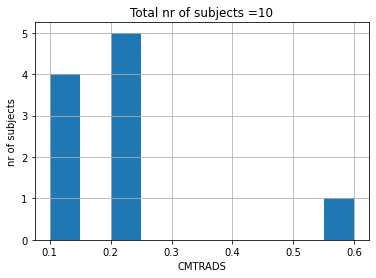

In [60]:
df_pheno[df_pheno['CMTRADS']<1]['CMTRADS'].hist()
plt.ylabel('nr of subjects')
plt.xlabel('CMTRADS') 
plt.title('Total nr of subjects ='+str(len(df_pheno[df_pheno['CMTRADS']<1])))

In [61]:
len(df_pheno[(df_pheno['CMTCHEMS']<1) | (df_pheno['CMTRADS']<1)])

35

In [62]:
~pd.isna(df_pheno['LAA950_Total'])

1       False
2        True
3        True
4       False
5       False
        ...  
1498    False
1499     True
1500    False
1501    False
1502     True
Name: LAA950_Total, Length: 1502, dtype: bool

Text(0.5, 0, 'LAA950_Total')

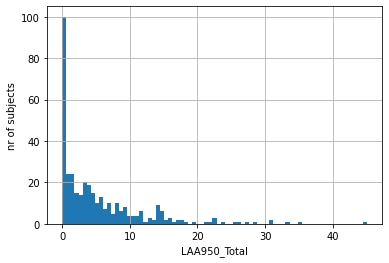

In [63]:
df_pheno[~df_pheno['cp2primdx'].str.contains('Emphysema')]['LAA950_Total'].dropna().hist(bins=75)
plt.ylabel('nr of subjects')
plt.xlabel('LAA950_Total') 

In [64]:
len(df_pheno['LAA950_Total'].dropna())

815

We exclude samples where the patients are exposed to concomitant radiation or chemo-therapy

In [65]:
relevant_columns = ['CMTCHEMD', 'CMTCHEM2', 'CMTRADD']
for i in relevant_columns:
    print(i, df_pheno_description[df_pheno_description['variable_name']==i]['variable_description'].values[0])

CMTCHEMD Chemotherapy duration from Concomitant Therapy (CMT) report; unspecified units
CMTCHEM2 Chemotherapy for cancer CHEM2 (such as bleomycin; cyclophosphamide; ARA-C; nitrosoureas; Gemcytibine; Imuran; Iressa) from Concomitant Therapy (CMT) report: 1=Yes;0=No
CMTRADD Thoracic radiation duration number of years from Concomitant Therapy (CMT) report


In [66]:
print(len(df_pheno))
df_pheno = df_pheno[((df_pheno['CMTCHEMS']>=1) | (pd.isna(df_pheno['CMTCHEMS']))) &
                    ((df_pheno['CMTRADS']>=1) | (pd.isna(df_pheno['CMTRADS'])))]
print(len(df_pheno))


1502
1467


In [67]:
pd.isna

<function pandas.core.dtypes.missing.isna(obj)>

# Emphysema group 

In [68]:
relevant_columns = ['postGold','cntrlCopdIld', 'Perc15_Total', 'sevCopd_pathConserv','smoking_ever','cp2primdx','smoking_packyears','LAA950_Total']
for i in relevant_columns:
    print('##################################')
    print(i,':', df_pheno_description[df_pheno_description['variable_name']==i]['variable_description'].values[0])

##################################
postGold : Post-bronchodilator GOLD spirometry stage: -1=PRISm;0=normal;1-4=increasing severity airflow limitation
##################################
cntrlCopdIld : Variable defining mutually exclusive Controls; COPD cases; and ILD/IIP cases with the following logic: 0=Controls: Have normal spirometry with the modCopd variable being 0 and with no pathologic diagnosis of ILD/IIP; sarcoidosis; constrictive bronchiolitis (cellular OK); cellular hypersensitivity pneumonitis; diffuse alveolar damage (DAD); or eosinophilic granuloma. Additionally excluded individuals with a clinical diagnosis (based on site PI review of all available information) of IPF or sarcoidosis. 1=COPD: Have GOLD 2-4 airflow limitation  with modCopd variable being 1 and with no pathologic diagnosis of ILD/IIP; sarcoidosis; constrictive bronchiolitis (cellular OK); cellular hypersensitivity pneumonitis; diffuse alveolar damage (DAD); or eosinophilic granuloma. Additionally excluded in

In [69]:
#emphysema conditions: 
df_copd = df_pheno[(df_pheno['postGold'] >= 3) & 
             #(df_pheno['Perc15_Total'] < -900) &
             (df_pheno.cntrlCopdIld==1) &
             (df_pheno['smoking_ever'] == 1) & 
            #(df_pheno['cp2primdx'].str.contains('Emphysema'))&
             (df_pheno['LAA950_Total']>=10) &
            (df_pheno['smoking_packyears']>5)]
copd_sample_ids = df_copd['rnaBamId']
df_copd

,Project,saphId.cdnm,sampleId.cdnm,Specimentypedesc,topmedId,rnaBamId,Qc.Status,Qc.Description,Filepath,lungLobe,...,pmh_asthma_md,CMTCHEMS,CMTRADD,CMTRADS,CMTCHEM1,cdrprimdx_concat,cdrsecdx_concat,cntrlCopdIld,cntrlCopdFib,cntrlCopdIpf
3,RNASeq,ST-01027640,S-001693679,LUNG,TOR101804,308696,Pass,NaN,/proj/regeps/regep00/studies/COPDGene/data/rna...,R_Lower,...,1.0,NaN,NaN,NaN,NaN,Emphysema,NaN,1.0,1.0,1.0
6,RNASeq,ST-01028045,S-001724294,LUNG,TOR102892,309025,Pass,NaN,/proj/regeps/regep00/studies/COPDGene/data/rna...,L_Upper,...,NaN,NaN,NaN,NaN,NaN,Emphysema,NaN,1.0,1.0,1.0
26,RNASeq,ST-01028289,S-001723284,LUNG,TOR114084,309228,Pass,Low Conc,/proj/regeps/regep00/studies/COPDGene/data/rna...,L_Upper,...,NaN,NaN,NaN,NaN,NaN,Emphysema,NaN,1.0,1.0,1.0
32,RNASeq,ST-01027239,S-001723442,LUNG,TOR118350,308476,Pass,NaN,/proj/regeps/regep00/studies/COPDGene/data/rna...,L_Ling,...,1.0,NaN,NaN,NaN,NaN,Emphysema,Fibrosis-Uncharacterized,1.0,1.0,1.0
37,RNASeq,ST-01026668,S-001718133,LUNG,TOR118818,308375,Pass,Low Conc,/proj/regeps/regep00/studies/COPDGene/data/rna...,L_Upper,...,NaN,NaN,NaN,NaN,NaN,Emphysema,"Carcinoma, non-small cell",1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,RNASeq,ST-01028681,S-001749688,LUNG,TOR965790,311548,Pass,NaN,/proj/regeps/regep00/studies/COPDGene/data/rna...,R_Lower,...,NaN,NaN,NaN,NaN,NaN,Hypersensitivity Pneumonitis,Emphysema,1.0,1.0,1.0
1460,RNASeq,ST-01027239,S-001692393,LUNG,TOR974203,308475,Pass,NaN,/proj/regeps/regep00/studies/COPDGene/data/rna...,R_Lower,...,1.0,NaN,NaN,NaN,NaN,Emphysema,Fibrosis-Uncharacterized,1.0,1.0,1.0
1468,RNASeq,ST-01027633,S-001723440,LUNG,TOR977905,308688,Pass,Low Conc,/proj/regeps/regep00/studies/COPDGene/data/rna...,L_Upper,...,NaN,NaN,NaN,NaN,NaN,Emphysema,NaN,1.0,1.0,1.0
1478,RNASeq,ST-01026498,S-001723279,LUNG,TOR985819,308312,Pass,NaN,/proj/regeps/regep00/studies/COPDGene/data/rna...,L_Lower,...,NaN,NaN,NaN,NaN,NaN,Emphysema,NaN,1.0,1.0,1.0


# Smoker control group 

In [70]:
relevant_columns = ['LAA950_Total','smoking_ever','cntrlCopdIld']
for i in relevant_columns:
    print('##################################')
    print(i,':', df_pheno_description[df_pheno_description['variable_name']==i]['variable_description'].values[0])

##################################
LAA950_Total : Percent of lung low attenuation areas less than -950 Hounsfield units (HU)
##################################
smoking_ever : Ever smoker: 1=Yes;0=No
##################################
cntrlCopdIld : Variable defining mutually exclusive Controls; COPD cases; and ILD/IIP cases with the following logic: 0=Controls: Have normal spirometry with the modCopd variable being 0 and with no pathologic diagnosis of ILD/IIP; sarcoidosis; constrictive bronchiolitis (cellular OK); cellular hypersensitivity pneumonitis; diffuse alveolar damage (DAD); or eosinophilic granuloma. Additionally excluded individuals with a clinical diagnosis (based on site PI review of all available information) of IPF or sarcoidosis. 1=COPD: Have GOLD 2-4 airflow limitation  with modCopd variable being 1 and with no pathologic diagnosis of ILD/IIP; sarcoidosis; constrictive bronchiolitis (cellular OK); cellular hypersensitivity pneumonitis; diffuse alveolar damage (DAD); or

In [71]:
df_smoker_control = df_pheno[(df_pheno.cntrlCopdIld==0) & 
         (df_pheno.smoking_ever!=0) &
         (df_pheno['smoking_packyears']>5) &
        #~(df_pheno['cp2primdx'].str.contains('Emphysema'))
         (df_pheno['LAA950_Total']<10) ]          
smoker_control_sample_ids = df_smoker_control['rnaBamId']
df_smoker_control

,Project,saphId.cdnm,sampleId.cdnm,Specimentypedesc,topmedId,rnaBamId,Qc.Status,Qc.Description,Filepath,lungLobe,...,pmh_asthma_md,CMTCHEMS,CMTRADD,CMTRADS,CMTCHEM1,cdrprimdx_concat,cdrsecdx_concat,cntrlCopdIld,cntrlCopdFib,cntrlCopdIpf
10,RNASeq,ST-01027809,S-001705553,LUNG,TOR105474,308823,Pass,NaN,/proj/regeps/regep00/studies/COPDGene/data/rna...,R_Middle,...,NaN,NaN,NaN,NaN,NaN,"Carcinoma, non-small cell",NaN,0.0,0.0,0.0
22,RNASeq,ST-01026598,S-001706291,LUNG,TOR112677,304597,Pass,NaN,/proj/regeps/regep00/studies/COPDGene/data/rna...,R_Upper,...,NaN,NaN,NaN,NaN,NaN,Granulomatous Infection (NOS),Emphysema,0.0,0.0,0.0
28,RNASeq,ST-01027305,S-001714924,LUNG,TOR115155,308510,Pass,NaN,/proj/regeps/regep00/studies/COPDGene/data/rna...,L_Upper,...,NaN,NaN,NaN,NaN,NaN,"Carcinoma, non-small cell","Emphysema, Fibrosis-Uncharacterized, Granuloma...",0.0,0.0,0.0
39,RNASeq,ST-01026670,S-001716398,LUNG,TOR119603,308376,Pass,NaN,/proj/regeps/regep00/studies/COPDGene/data/rna...,L_Upper,...,NaN,NaN,NaN,NaN,NaN,Emphysema,"Respiratory bronchiolitis (RB), Carcinoma, non...",0.0,0.0,0.0
58,RNASeq,ST-01028200,S-001716374,LUNG,TOR132030,309152,Pass,NaN,/proj/regeps/regep00/studies/COPDGene/data/rna...,L_Upper,...,NaN,NaN,NaN,NaN,0.0,"Emphysema, Respiratory bronchiolitis (RB)","Carcinoma, non-small cell",0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,RNASeq,ST-01028016,S-001732813,LUNG,TOR942032,309003,Pass,Pass,/proj/regeps/regep00/studies/COPDGene/data/rna...,L_Upper,...,NaN,NaN,NaN,NaN,NaN,Normal,"Carcinoma, non-small cell",0.0,0.0,0.0
1426,RNASeq,ST-01026521,S-001710373,LUNG,TOR961866,308331,Pass,NaN,/proj/regeps/regep00/studies/COPDGene/data/rna...,R_Lower,...,1.0,NaN,NaN,NaN,NaN,"Carcinoma, non-small cell;Carcinoma, non-small...","Respiratory bronchiolitis (RB), Emphysema;Resp...",0.0,0.0,0.0
1442,RNASeq,ST-01027792,S-001717629,LUNG,TOR967396,308807,Pass,NaN,/proj/regeps/regep00/studies/COPDGene/data/rna...,R_Upper,...,NaN,NaN,NaN,NaN,NaN,Emphysema,NaN,0.0,0.0,0.0
1474,RNASeq,ST-01026656,S-001716587,LUNG,TOR984473,308368,Pass,NaN,/proj/regeps/regep00/studies/COPDGene/data/rna...,R_Upper,...,NaN,NaN,NaN,NaN,NaN,Emphysema,"Carcinoma, non-small cell",0.0,0.0,0.0


# Non-smoking non-COPD group 

In [72]:
relevant_columns = ['cntrlCopdIld','smoking_ever','LAA950_Total']
for i in relevant_columns:
    print('##################################')
    print(i,':', df_pheno_description[df_pheno_description['variable_name']==i]['variable_description'].values[0])

##################################
cntrlCopdIld : Variable defining mutually exclusive Controls; COPD cases; and ILD/IIP cases with the following logic: 0=Controls: Have normal spirometry with the modCopd variable being 0 and with no pathologic diagnosis of ILD/IIP; sarcoidosis; constrictive bronchiolitis (cellular OK); cellular hypersensitivity pneumonitis; diffuse alveolar damage (DAD); or eosinophilic granuloma. Additionally excluded individuals with a clinical diagnosis (based on site PI review of all available information) of IPF or sarcoidosis. 1=COPD: Have GOLD 2-4 airflow limitation  with modCopd variable being 1 and with no pathologic diagnosis of ILD/IIP; sarcoidosis; constrictive bronchiolitis (cellular OK); cellular hypersensitivity pneumonitis; diffuse alveolar damage (DAD); or eosinophilic granuloma. Additionally excluded individuals with a clinical diagnosis (based on site PI review of all available information) of IPF or sarcoidosis. 2=ILD: Any spirometry value with ILD

In [73]:
df_non_smoker_control = df_pheno[(df_pheno.cntrlCopdIld==0) & 
         (df_pheno.smoking_ever==0) &
        #~(df_pheno['cp2primdx'].str.contains('Emphysema'))
         (df_pheno['LAA950_Total']<10) &
         (~pd.isna(df_pheno['LAA950_Total']))] 
non_smoker_control_sample_ids = df_non_smoker_control['rnaBamId']
df_non_smoker_control

,Project,saphId.cdnm,sampleId.cdnm,Specimentypedesc,topmedId,rnaBamId,Qc.Status,Qc.Description,Filepath,lungLobe,...,pmh_asthma_md,CMTCHEMS,CMTRADD,CMTRADS,CMTCHEM1,cdrprimdx_concat,cdrsecdx_concat,cntrlCopdIld,cntrlCopdFib,cntrlCopdIpf
40,RNASeq,ST-01027989,S-001738929,LUNG,TOR120774,308979,Pass,NaN,/proj/regeps/regep00/studies/COPDGene/data/rna...,R_Upper,...,NaN,NaN,NaN,NaN,NaN,"Carcinoma, non-small cell",Emphysema,0.0,0.0,0.0
81,RNASeq,ST-01027814,S-001716396,LUNG,TOR145805,308827,Pass,Low Conc,/proj/regeps/regep00/studies/COPDGene/data/rna...,R_Upper,...,NaN,NaN,0.2,3.5,NaN,Emphysema,"Carcinoma, non-small cell",0.0,0.0,0.0
87,RNASeq,ST-01027325,S-001703447,LUNG,TOR149896,304616,Pass,NaN,/proj/regeps/regep00/studies/COPDGene/data/rna...,L_Ling,...,NaN,1.0,0.1,1.0,NaN,"Carcinoma, non-small cell","Emphysema, Other",0.0,0.0,0.0
108,RNASeq,ST-01027936,S-001716585,LUNG,TOR163548,308933,Pass,NaN,/proj/regeps/regep00/studies/COPDGene/data/rna...,R_Upper,...,1.0,NaN,NaN,NaN,NaN,"Carcinoma, non-small cell",Respiratory bronchiolitis (RB),0.0,0.0,0.0
114,RNASeq,ST-01028665,S-001718882,LUNG,TOR166127,309522,Pass,Pass,/proj/regeps/regep00/studies/COPDGene/data/rna...,L_Lower,...,1.0,NaN,NaN,NaN,0.0,"Eosinophilic Granuloma (EG, LCG)",NaN,0.0,0.0,0.0
119,RNASeq,ST-01027775,S-001739942,LUNG,TOR168381,308794,Pass,NaN,/proj/regeps/regep00/studies/COPDGene/data/rna...,R_Lower,...,NaN,NaN,NaN,NaN,NaN,Granulomatous Infection (NOS),"Carcinoma, non-small cell",0.0,0.0,0.0
129,RNASeq,ST-01027761,S-001737170,LUNG,TOR175404,308783,Pass,NaN,/proj/regeps/regep00/studies/COPDGene/data/rna...,R_Middle,...,NaN,NaN,NaN,NaN,NaN,Granulomatous Infection (NOS),"Emphysema, Carcinoma, non-small cell",0.0,0.0,0.0
150,RNASeq,ST-01028187,S-001717421,LUNG,TOR185918,309139,Pass,Low Conc,/proj/regeps/regep00/studies/COPDGene/data/rna...,R_Upper,...,NaN,NaN,NaN,NaN,NaN,"Emphysema, Respiratory bronchiolitis (RB)",Fibrosis-Uncharacterized,0.0,0.0,0.0
157,RNASeq,ST-01027834,S-001706470,LUNG,TOR190328,308846,Pass,NaN,/proj/regeps/regep00/studies/COPDGene/data/rna...,L_Lower,...,NaN,NaN,NaN,NaN,NaN,"Carcinoma, non-small cell",Emphysema,0.0,0.0,0.0
235,RNASeq,ST-01027978,S-001709031,LUNG,TOR234946,308969,Pass,NaN,/proj/regeps/regep00/studies/COPDGene/data/rna...,R_Upper,...,NaN,NaN,NaN,NaN,NaN,Emphysema,Other,0.0,0.0,0.0


In [74]:
print(set(smoker_control_sample_ids).intersection(copd_sample_ids))
print(set(smoker_control_sample_ids).intersection(non_smoker_control_sample_ids))
print(set(copd_sample_ids).intersection(non_smoker_control_sample_ids))

set()
set()
set()


<Axes: >

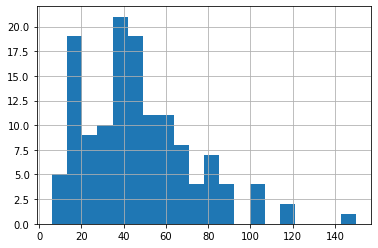

In [75]:
df_copd['smoking_packyears'].hist(bins=20)

<Axes: >

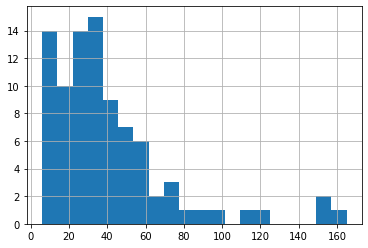

In [76]:
df_smoker_control['smoking_packyears'].hist(bins=20)

<Axes: >

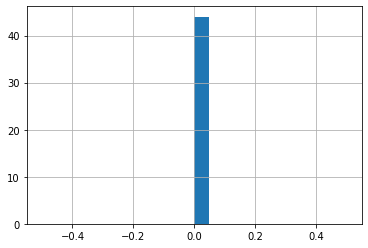

In [77]:
df_non_smoker_control['smoking_packyears'].hist(bins=20)

# Loading RNA-Seq data 

In [78]:
df_males=pd.read_csv('/proj/regeps/regep00/studies/LTRC/analyses/network_group/ltrc/v1/data/LTRC_expression_19321genes_batchCorrected_logtmm_797males.txt',sep='\t')
df_females=pd.read_csv('/proj/regeps/regep00/studies/LTRC/analyses/network_group/ltrc/v1/data/LTRC_expression_19321genes_batchCorrected_logtmm_705females.txt',sep='\t')
df=df_females.join(df_males)
df.columns=[int(i) for i in df.columns]
df_stack=df.stack()

In [79]:
#converting Ensembl ids to gene symbols
df_pheno.sevCopd.dropna()
df_gene_mapping=pd.read_csv('Mapping_gene.csv',sep='\t')
ensmbl_gene_dict=dict(zip(df_gene_mapping['Ensembl ID(supplied by Ensembl)'],df_gene_mapping['Approved symbol']))
for i in set(df.index)-set(ensmbl_gene_dict.keys()):
    ensmbl_gene_dict[i]=''
    
df['Gene']=df.apply(lambda row: ensmbl_gene_dict[row.name], axis=1)

# Plotting genes of interest 

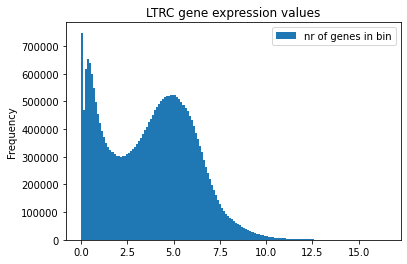

In [80]:
df_stack.plot.hist(bins=150,label='nr of genes in bin')
plt.title('LTRC gene expression values')
#plt.axvline(x=hist_x[xcoords[1]], color='red',label='Local minimum at Log2FC (?)=%f'%hist_x[xcoords[1]])
plt.legend()

# Figure for paper 

N_COPD= 135 N_smoker_control: 88 N_non_smoker_control: 44


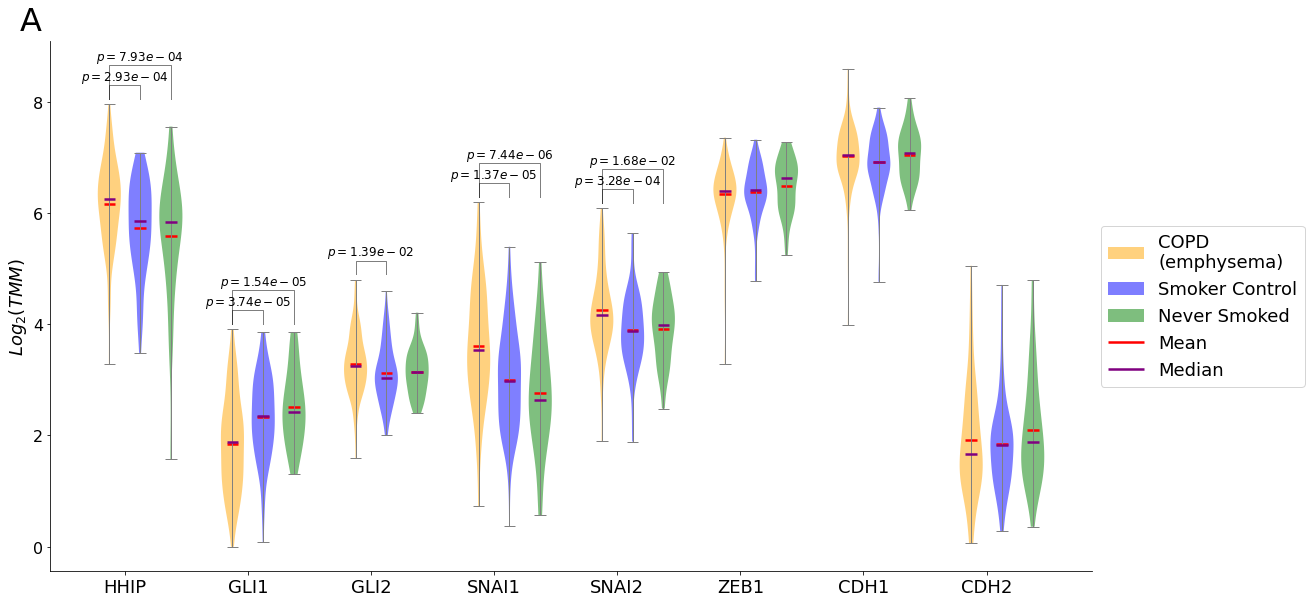

In [82]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

genes=['HHIP', 'GLI1', 'GLI2', 'SNAI1', 'SNAI2', 'ZEB1', 'CDH1', 'CDH2']

for gene in genes[:]:
    #print(gene)
    if len(df[df.Gene == gene])==0:
        print('no hit for gene %s'%gene)
        genes.remove(gene)


space_between_groups=4
space_within_groups=1

x1=1
x2=1+space_within_groups
x3=x2+space_within_groups


fig, ax = plt.subplots(1, 1, figsize=(15,8))

medianprops = dict(linestyle='--', linewidth=2.5, color='purple')
meanprops = dict(linestyle='-', linewidth=2.5, color='red')

for gene in genes:

    copd_values=df[df.Gene == gene][copd_sample_ids].values[0]
    control_values=df[df.Gene == gene][smoker_control_sample_ids].values[0]
    never_smoked_non_copd_values=df[df.Gene == gene][non_smoker_control_sample_ids].values[0]

    bp = ax.violinplot([copd_values,control_values,never_smoked_non_copd_values], positions = [x1, x2, x3], widths = .75, showmeans=True, showmedians=True)

    colors=['orange','blue','green']
    #for patch, color in zip(bp['boxes'], colors):
    for patch, color in zip(bp['bodies'], colors):

        patch.set_facecolor(color)
        patch.set_alpha(0.5)
        
    bp['cmeans'].set_color(meanprops['color'])
    bp['cmeans'].set_linewidth(meanprops['linewidth'])
    bp['cmedians'].set_color(medianprops['color'])
    bp['cmedians'].set_linewidth(medianprops['linewidth'])    
    bp['cbars'].set_color('grey')
    bp['cbars'].set_linewidth(1)
    bp['cmins'].set_color('grey')
    bp['cmins'].set_linewidth(1)
    bp['cmaxes'].set_color('grey')
    bp['cmaxes'].set_linewidth(1)


    y = max(list(copd_values)+list(control_values)+list(never_smoked_non_copd_values))+0.1
    h = 0.25
    h2 = 0.35
    col='black'
    
    t_statistic_0,p_value_0=stats.mannwhitneyu(copd_values, control_values) 
    t_statistic_1,p_value_1=stats.mannwhitneyu(control_values, never_smoked_non_copd_values)
    t_statistic_2,p_value_2=stats.mannwhitneyu(copd_values, never_smoked_non_copd_values)

    if p_value_0<0.05:
        stars=str(r'$p={:.2e}$'.format(p_value_0))

        ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col,alpha = 0.5)
        ax.text((x1+x2)*.5, y+h, stars, ha='center', va='bottom', color=col, fontsize=12)
    if p_value_1<0.05:
        stars=str(r'$p={:.2e}$'.format(p_value_1 ))

        ax.plot([x2, x2, x3, x3], [y, y+h, y+h, y], lw=1, c=col,alpha = 0.5)
        ax.text((x2+x3)*.5, y+h, stars, ha='center', va='bottom', color=col, fontsize=12)
    if p_value_2<0.05:
        stars=str(r'$p={:.2e}$'.format(p_value_2))

        ax.plot([x1, x1, x3, x3], [y, y+h+h2, y+h+h2, y], lw=1, c=col,alpha = 0.5)
        ax.text((x1+x3)*.5, y+h+h2, stars, ha='center', va='bottom', color=col, fontsize=12)


    x1+=space_between_groups
    x2+=space_between_groups
    x3+=space_between_groups

print('N_COPD=',len(copd_values),
     'N_smoker_control:',len(control_values),
     'N_non_smoker_control:',len(never_smoked_non_copd_values))

ax.tick_params(axis='y', which='major', labelsize=16)
ax.set_xticks(np.arange(1,len(genes)*space_between_groups,space_between_groups)+0.5*space_within_groups)
ax.set_xticklabels(genes,fontsize=18)
fig.tight_layout()
sns.despine()
ax.legend([bp["bodies"][0],bp["bodies"][1],bp["bodies"][2],bp['cmeans'],bp['cmedians']],['COPD\n(emphysema)','Smoker Control', 'Never Smoked','Mean', 'Median'],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=18)
ax.set_ylabel(r'$Log_2 (TMM)$', fontsize=18)
ax.text(ax.get_xlim()[0]-1,ax.get_ylim()[1]+.2,'A',fontsize=32)
plt.savefig('figures/Figure6A.png',bbox_inches='tight',dpi=300)
plt.savefig('figures/Figure6A.pdf',bbox_inches='tight')
